In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import os

In [31]:
directory = "../../datasets/fractions/data/"
dfs = [pd.read_csv(os.path.join(directory,file)) for file in os.listdir(directory)]
dfs = pd.concat(d   fs)
x_max = dfs["x"].max()
y_max = dfs["y"].max()
cscw_name_mapping = {
            "id": "subject_id",
            "Fixation Start [ms]": "time",
            "Position X": "x",
            "Position Y": "y",
            "Average Pupil Size [px] X": "pupil_diameter",
            "Fixation Duration [ms]": "duration",
            "Fixation End [ms]": "fixation_end",
        }
fractions_name_mapping = {
            "id": "subject_id",
            "start": "time",
            "x": "x",
            "y": "y",
            "Avg_Pupil_Size_X": "pupil_diameter",
            "duration": "duration",
            "end": "fixation_end",
        }
a = df.rename(columns=fractions_name_mapping)

In [32]:
print(x_max)
print(y_max)


1127.97
844.7899999999997


In [12]:

def get_saccade_length(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]
    return pd.Series([np.linalg.norm(a - b) for a, b in zip(coordinates, shifted_coordinates)])


def get_saccade_duration(data):
    endtimes = data.loc[:, "fixation_end"].to_numpy()
    starttimes = data.loc[:, "time"].to_numpy()
    shifted_starttimes = np.roll(starttimes, -1, axis=0).tolist()
    shifted_starttimes[-1] = starttimes[-1]
    return pd.Series(shifted_starttimes - endtimes)


def get_angle_of_saccades(data):
    coordinates = data.loc[:, ["x", "y"]].to_numpy()
    shifted_coordinates = np.roll(coordinates, -1, axis=0).tolist()
    shifted_coordinates[-1] = coordinates[-1]  # dette funker ikke må settes
    return [
        angle_between_coordinates(a, b)
        for a, b in zip(coordinates, shifted_coordinates)
    ]


def angle_between_coordinates(a, b):
    radians = math.atan2(b[1] - a[1], b[0] - a[0])
    return abs(radians)


def normalize_trials(df):
    # Since we combine the trials and only look at sections where they are reading code, it is a huge gap in time in the middle
    trial_1_endtime = df.loc[df["trial_number"] == 1, "fixationEnd"].iloc[-1]
    trial_2_starttime = df.loc[df["trial_number"] == 2, "fixationStart"].iloc[0]
    diff = trial_2_starttime - trial_1_endtime
    df.loc[df["trial_number"] == 2, "fixationStart"] -= diff
    df.loc[df["trial_number"] == 2, "fixationEnd"] -= diff
    return df

def normalize_time(df):

    min_time = df["time"].iloc[0]
    df["time"] = df["time"] - min_time
    df["fixation_end"] = df["fixation_end"] - min_time
    df = fix_outliers_in_time(df)
    return df


def fix_outliers_in_time(df):
    saccade_durations = get_saccade_duration(df)
    saccade_durations.index = df.index
    median_duration = saccade_durations.median()
    threshold = 1000
    print(threshold, "threshold")
    
    
    bool_series = saccade_durations > threshold
    indices = df[bool_series].index
    print(saccade_durations)
    for i in indices:
        diff = saccade_durations[i]
        df.loc[i+1:,"time"] -= diff - median_duration
        df.loc[i+1:,"fixation_end"] -= diff - median_duration
    return df
    
    



In [13]:

#df["time"] = df["time"]/1000
#df["fixation_end"] = df["fixation_end"]/1000


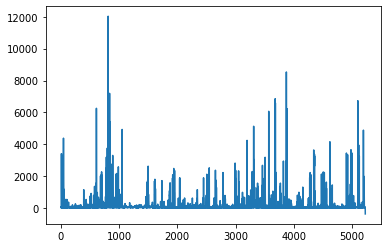

1000 threshold
0        71.982
1        23.279
2        67.899
3        60.023
4        47.943
         ...   
5226     55.997
5227     44.016
5228     16.025
5229     44.042
5230   -355.991
Length: 5231, dtype: float64
1000 threshold
0        71.982
1        23.279
2        67.899
3        60.023
4        47.943
         ...   
5226     55.997
5227     44.016
5228     16.025
5229     44.042
5230   -355.991
Length: 5231, dtype: float64


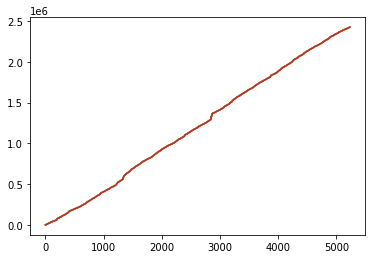

In [14]:
df = a
df = df[df["Event_Type"] == "Fixation L"]
df = df.reset_index()
plt.plot(get_saccade_duration(df))
plt.show()

df = normalize_time(df)
plt.plot(df["time"])
plt.plot(df["fixation_end"].shift(1))

df = fix_outliers_in_time(df)
plt.plot(df["time"])
plt.plot(df["fixation_end"].shift(1))
plt.show()
# cscw/data/Inchgower_1_1_VideoFixations_Details.csv

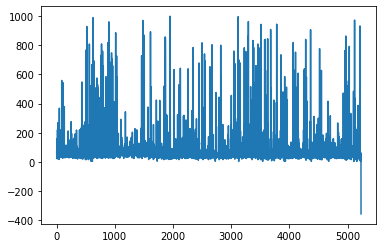

In [15]:
plt.plot(get_saccade_duration(df))
plt.show()

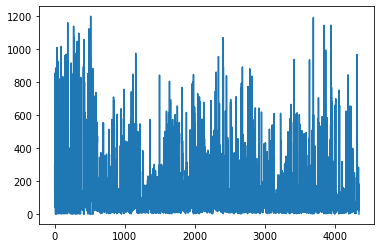

In [326]:
plt.plot(get_saccade_length(df))
plt.show()

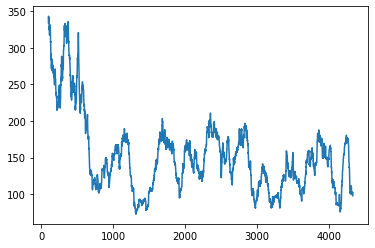

In [8]:
plt.plot(get_saccade_length(df).rolling(100).mean())
plt.show()

In [9]:
normalized_df = df/calibration_avg
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

NameError: name 'calibration_avg' is not defined

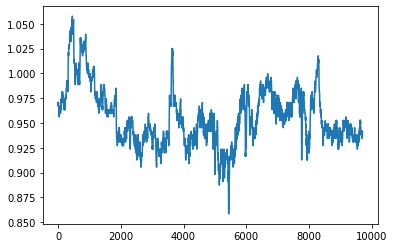

In [108]:
avg_first_30 = df.iloc[0:750, 0].mean()
normalized_df = df/avg_first_30
plt.plot(normalized_df["L Mapped Diameter [mm]"].values)

In [83]:
avg_first_30

4629    2.88
4630    2.88
4631    2.88
4632    2.88
4633    2.88
        ... 
5405    3.01
5406    3.00
5407    2.99
5408    2.98
5409    2.98
Name: L Mapped Diameter [mm], Length: 750, dtype: float64